# Week 11 Seminar Answers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf
import os

## Question 1

In [2]:
def newton_vol_put(S, K, T, P, r, q):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #C: Call value
    #r: risk free rate
    #sigma: volatility of underlying asset
   
    MAX_ITERATIONS = 100
    tolerance = 0.00000001
    
    sigma = 0.25
    
    for i in range(0, MAX_ITERATIONS):
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        price = - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
        vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)

        diff = P - price

        if (abs(diff) < tolerance):
            return sigma
        else: 
            sigma = sigma + diff/vega
        
        print(i,sigma,diff)
        
    return sigma

## Question 2

In [3]:
impvol = newton_vol_put(147.81, 150, 1/12, 6, 0.0353, 0.0062)
print('The implied volatility is', round(impvol*100,2) , '% for the one-month call with strike $ 150' ) 

0 0.2942759574490704 0.7465543168831772
1 0.29418510846491097 -0.0015376405371085866
The implied volatility is 29.42 % for the one-month call with strike $ 150


## Question 3

In [4]:
AAPL = yf.Ticker("AAPL")
opt = AAPL.option_chain('2023-01-06')
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL230106P00070000,2022-11-30 15:49:36+00:00,70.0,0.03,0.0,0.0,0.0,0.0,NaN,34,0.500005,False,REGULAR,USD
1,AAPL230106P00080000,2022-11-30 14:30:06+00:00,80.0,0.05,0.0,0.0,0.0,0.0,NaN,3,0.500005,False,REGULAR,USD
2,AAPL230106P00085000,2022-12-02 14:37:44+00:00,85.0,0.06,0.0,0.0,0.0,0.0,3.0,25,0.500005,False,REGULAR,USD
3,AAPL230106P00090000,2022-12-02 19:18:03+00:00,90.0,0.03,0.0,0.0,0.0,0.0,1.0,19,0.250007,False,REGULAR,USD
4,AAPL230106P00095000,2022-12-02 19:28:54+00:00,95.0,0.04,0.0,0.0,0.0,0.0,6.0,16,0.250007,False,REGULAR,USD
5,AAPL230106P00100000,2022-12-02 19:54:42+00:00,100.0,0.05,0.0,0.0,0.0,0.0,2.0,216,0.250007,False,REGULAR,USD
6,AAPL230106P00105000,2022-12-02 15:49:53+00:00,105.0,0.12,0.0,0.0,0.0,0.0,2.0,296,0.250007,False,REGULAR,USD
7,AAPL230106P00110000,2022-12-02 17:43:23+00:00,110.0,0.17,0.0,0.0,0.0,0.0,6.0,95,0.250007,False,REGULAR,USD
8,AAPL230106P00115000,2022-12-02 20:48:36+00:00,115.0,0.19,0.0,0.0,0.0,0.0,4.0,79,0.125009,False,REGULAR,USD
9,AAPL230106P00120000,2022-12-02 20:58:17+00:00,120.0,0.29,0.0,0.0,0.0,0.0,26.0,692,0.125009,False,REGULAR,USD


In [5]:
import mibian

In [6]:
impliedvol = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    p = mibian.Me([147.81, opt.puts.strike[i], 3.53, 0.62, 31], putPrice = opt.puts.lastPrice[i])
    impliedvol [i] = p.impliedVolatility

Text(0.5, 1.0, 'Volatility Smile')

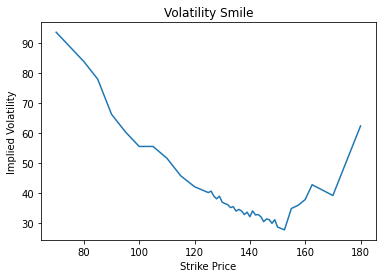

In [7]:
fig = plt.figure()
plt.plot(opt.puts.strike, impliedvol, '-')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Quetion 4

Text(0.5, 1.0, 'Volatility Smile')

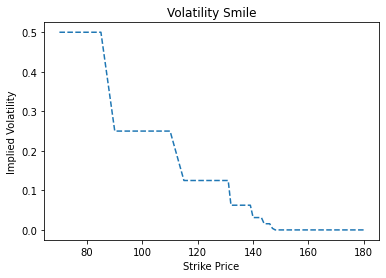

In [8]:
fig = plt.figure()
plt.plot(opt.puts.strike, opt.puts.impliedVolatility, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

## Question 5

In [9]:
difference = np.zeros((len(opt.puts.strike),1))
for i in range(len(opt.puts.strike)):
    difference[i] = impliedvol[i] - opt.puts.impliedVolatility[i]*100

Text(0.5, 1.0, 'Volatility Smile')

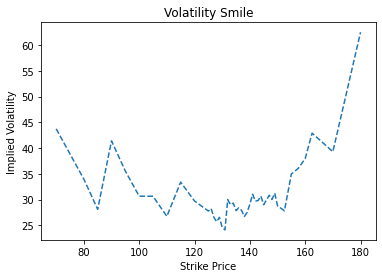

In [10]:
fig = plt.figure()
plt.plot(opt.puts.strike, difference, '--')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')

In [11]:
pp = mibian.Me([147.81, 150, 3.53, 0.62, 31], putPrice = 6)
pp.impliedVolatility

29.296875

## Question 6

In [12]:
import arrow
T = ['2022-12-09','2022-12-16','2022-12-23','2022-12-30','2023-01-06',
     '2023-01-13','2023-01-20','2023-02-17','2023-03-17','2023-04-21',
     '2023-05-19','2023-06-16','2023-07-21','2023-09-15','2024-01-19',
     '2024-03-15','2024-06-21','2025-01-17']

In [13]:
K = np.linspace(130.00,150.00,3)
now = arrow.get('2022-12-05')
days = np.zeros((len(T),1))
impliedvol_s = np.zeros((len(K),len(days)))
for j in range(len(days)):
    for i in range(len(K)):
        opt = AAPL.option_chain(T[j])
        temp = arrow.get(T[j])
        delta = temp - now
        days[j] = delta.days
        impliedvol_s [i,j] = opt.puts.impliedVolatility[opt.puts.strike == K[i]]

C:\Users\Admin\AppData\Local\Temp\ipykernel_12348\1477242953.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


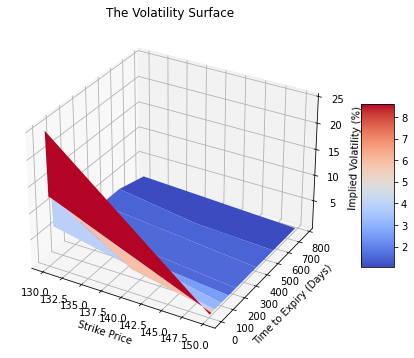

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
K, days = np.meshgrid(K, days)
surf = ax.plot_surface(K, days, impliedvol_s.T*100, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiry (Days)')
ax.set_zlabel('Implied Volatility (%)')
plt.title('The Volatility Surface')
fig.colorbar(surf, shrink=0.5, aspect=5);